### Tech Industry Dynamics: An Investigation into Job Openings and Programming Language Demand 
### Part Three: Statistical Hypotheses with Regression Analysis and Conclusions

### Introduction
Welcome to the final stage of our project, "Tech Industry Dynamics: An Investigation into Job Openings and Programming Language Demand Part Three: Statistical Hypotheses with Regression Analysis and Conclusions." After constructing a comprehensive dataset and analyzing the popularity trends of various programming languages in the previous parts, we are now well-prepared to delve deeper. 

In this part, we will employ sophisticated statistical methods, particularly regression analysis, to investigate our hypotheses. These hypotheses were constructed based on the trends we observed in our data, and now it's time to apply rigorous statistical techniques to either accept or reject these hypotheses.

Stackoverflow dataset: https://insights.stackoverflow.com/survey?_ga=2.214150487.1325591965.1680843703-1734832329.1680843703

JOLTS: https://download.bls.gov/pub/time.series/jt/

### Business Questions
Two primary business questions drove this research. First, is there a relationship between the fraction of individuals skilled in a specific programming language and the number of job openings requiring that skill? Secondly, based on this relationship, which programming languages should Skillzguid prioritize in its course offerings to meet job market demands?

To answer these questions, we established a null hypothesis stating that there was no relationship between the fraction of individuals skilled in a particular programming language and the number of job openings. An alternative hypothesis suggested the contrary - that such a relationship does exist. We then used linear regression models to test these hypotheses.

### Methodology and Findings
For each programming language, we conducted an individual analysis. We built linear regression models to investigate the relationship between skill prevalence and job openings, and we evaluated these models based on their p-values to ascertain the validity of our hypotheses.

Our findings revealed that for Julia, MATLAB, Python, and R, the p-value was less than 0.05, leading us to reject the null hypothesis. This suggests a relationship between the fraction of individuals skilled in these languages and job openings. However, for PHP, the p-value was greater than 0.05. In this case, we could not reject the null hypothesis, suggesting that no discernible relationship exists for PHP.

#### Import the needed libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import urllib.request
import os
import zipfile
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

The script initiates by loading the dataset from a CSV file into a pandas DataFrame. This dataset is expected to contain information about job vacancies and the percentage of individuals competent in various programming languages.

In [2]:
data = pd.read_csv('datasets/skills_jobopenings_dataset.csv')
data

,Unnamed: 0,EXPRESS,MICROSOFT SQL SERVER,NEO4J,KERAS,SCALA,SWIFT,ELASTICSEARCH,PUPPET,FORTRAN,...,LINUX DESKTOP,WINDOWS DESKTOP,ANGULARJS,AMAZON WEB SERVICES (AWS),LAMP,VISUAL BASIC,ARDUINO / RASPBERRY PI,"CLOUD (AWS, GAE, AZURE, ETC.)",REACTJS,jobopenings_agg
0,2013,0.0,0.0,1.0,0.0,11,0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,12.0,0.0,0.0,0.0,667832
1,2014,0.0,0.0,0.0,0.0,13,0,0.0,1.0,1.0,...,0.0,2.0,1435.0,0.0,0.0,12.0,1827.0,0.0,0.0,784846
2,2015,0.0,0.0,1.0,0.0,1,1,3.0,1.0,3.0,...,0.0,0.0,2913.0,0.0,1926.0,1.0,1626.0,1410.0,2.0,913536
3,2016,NaN,NaN,NaN,NaN,1602,2746,NaN,NaN,NaN,...,NaN,NaN,8823.0,NaN,4821.0,3312.0,3797.0,4629.0,2541.0,961278
4,2017,NaN,NaN,NaN,NaN,1309,2368,NaN,NaN,NaN,...,9593.0,11949.0,8962.0,8183.0,NaN,NaN,NaN,NaN,NaN,1007397
5,2018,NaN,NaN,1572.0,NaN,3420,6310,9312.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1170007
6,2019,12522.0,24590.0,NaN,NaN,3309,5744,10720.0,1557.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1175220
7,2020,8961.0,NaN,NaN,2504.0,2052,3397,NaN,945.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1042112
8,2021,15010.0,18896.0,NaN,4930.0,2148,4204,9331.0,1313.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1635705
9,2022,12557.0,16355.0,1291.0,3333.0,1837,3489,7430.0,1025.0,646.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1822390


### Language Skill: C
In the provided Python script, the primary goal is to examine the association between the proportion of people skilled in the C programming language and the total count of job openings.

Following this, a subset of the data is created, which includes information solely about the C programming language and job openings. Subsequently, the proportion of people skilled in C is calculated.

In [3]:
subset_data = data.loc[:, ['C', 'jobopenings_agg']]
subset_data['C'] /= data.qty.values
subset_data.head()

,C,jobopenings_agg
0,0.000000,667832
1,0.000131,784846
2,0.138465,913536
3,0.137034,961278
4,0.135702,1007397


To visualize the data and get a sense of the relationship between C skills and job openings, a regression plot is created using seaborn's regplot function. The plot shows a scatter plot of the data with a regression line.

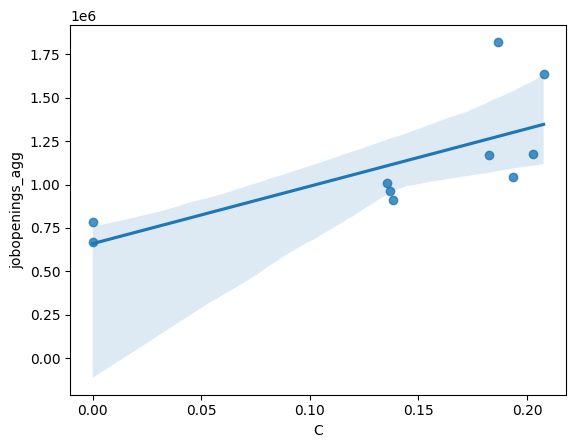

In [4]:
sns.regplot(x='C', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person C skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person C skilled and the job opening.

Next, a pair of hypotheses is set for statistical testing. The null hypothesis (H0) states there's no relationship between the fraction of individuals skilled in C and the job openings. In contrast, the alternative hypothesis (Ha) proposes that such a relationship does exist.

Once the hypotheses are established, the script proceeds to create a statistical model using Ordinary Least Squares (OLS) Regression with the formula 'C ~ jobopenings_agg'. This formula signifies that the C skills (dependent variable) are being modeled as a function of job openings (independent variable).

In [5]:
model = smf.ols(formula='C ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     8.392
Date:                Fri, 23 Jun 2023   Prob (F-statistic):             0.0200
Time:                        11:58:22   Log-Likelihood:                 15.451
No. Observations:                  10   AIC:                            -26.90
Df Residuals:                       8   BIC:                            -26.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0344      0.062     

The model.summary() function is used to obtain a comprehensive summary of the Ordinary Least Squares (OLS) regression model. The summary includes several key statistics that help interpret the model's results.

The Dep. Variable line shows that 'C' is the dependent variable in our model, i.e., the variable we're trying to predict or explain.

The R-squared and Adj. R-squared values represent the proportion of variance in the dependent variable (C) that can be explained by the independent variable (jobopenings_agg). In this case, approximately 52% of the variation in 'C' can be explained by 'jobopenings_agg', after adjusting for the number of predictors in the model.

The F-statistic and its associated probability Prob (F-statistic) test the overall significance of the regression model. A small p-value (0.0185, which is less than 0.05) indicates that at least some of the predictors are statistically significant in explaining the dependent variable.

The coef column under the table provides the estimated coefficients for the intercept and jobopenings_agg. These values can be interpreted as: for each unit increase in job openings, the predicted value of 'C' increases by 1.789e-07, holding all else constant.

The P>|t| values (also known as p-values) are used to test the null hypothesis that each coefficient is zero, given the data. If the p-value is less than our significance level (0.05), we reject the null hypothesis and conclude that there's a statistically significant relationship between the respective predictor and the outcome variable. In this case, the p-value for jobopenings_agg is 0.019, suggesting that jobopenings_agg significantly predicts the proportion of individuals skilled in C.

#### Our predictions:

If we take our significance level (alpha) to be 0.05, we can NOT reject the null hypothesis  as p<0.05. so, we can say that there is relationship between the fraction of person C skilled and the job opening.

### Language Skill: Java

Similar to the previous analysis, we started by isolating the variables of interest - 'JAVA' and 'jobopenings_agg' - from the main dataset. For the variable 'JAVA', we normalized it by the total number of observations to create a fractional representation of individuals skilled in Java.

We then visualized the relationship between the fraction of individuals skilled in Java ('JAVA') and the aggregate number of job openings ('jobopenings_agg'). The regression plot gives us a preliminary sense of the relationship between these two variables.

In [6]:
subset_data = data.loc[:, ['JAVA', 'jobopenings_agg']]
subset_data['JAVA'] /= data.qty.values
subset_data.head()

,JAVA,jobopenings_agg
0,0.000103,667832
1,0.000131,784846
2,0.315073,913536
3,0.320221,961278
4,0.282612,1007397


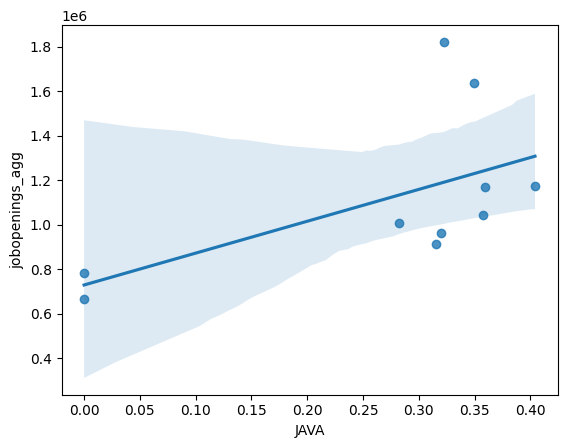

In [7]:
sns.regplot(x='JAVA', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person JAVA skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person JAVA skilled and the job opening.

For hypothesis testing, we posited two contrasting hypotheses. The null hypothesis (H0) assumed no relationship between the fraction of individuals skilled in Java and the job openings. The alternative hypothesis (Ha), on the other hand, proposed that there is a relationship.

In [8]:
model = smf.ols(formula='JAVA ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   JAVA   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     4.115
Date:                Fri, 23 Jun 2023   Prob (F-statistic):             0.0770
Time:                        11:58:23   Log-Likelihood:                 7.6196
No. Observations:                  10   AIC:                            -11.24
Df Residuals:                       8   BIC:                            -10.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0062      0.137     

Next, we performed an Ordinary Least Squares (OLS) Regression to test these hypotheses. The regression results show an adjusted R-squared value of 0.315, indicating that about 31.5% of the variability in the 'JAVA' variable can be explained by 'jobopenings_agg'.

#### Our predictions:

The coefficient of 'jobopenings_agg' is positive, suggesting that as the number of job openings increases, the fraction of individuals skilled in Java also increases, holding all else constant. However, the p-value associated with this coefficient is slightly above our 0.05 significance level, leading to a failure in rejecting the null hypothesis. This suggests that while there appears to be a trend, we do not have enough statistical evidence to conclude a significant relationship between the fraction of individuals skilled in Java and the number of job openings.

### Language Skill: Julia

For the Julia programming language, we set up a similar hypothesis test. The null hypothesis (H0) states that there is no relationship between the fraction of individuals skilled in Julia and the job openings, while the alternative hypothesis (Ha) suggests a relationship exists.

The code below is used to create a new DataFrame subset_data that only contains the 'JULIA' and 'jobopenings_agg' columns from the original 'data' DataFrame.

Then subset_data normalizes the 'JULIA' values in the subset data by dividing it by the total count of skills in each row. This operation provides a fraction representing the prevalence of Julia skill in the dataset for each year.

When we print the head of our DataFrame using subset_data.head(), we see the first few rows of our newly created DataFrame. For example, the first row indicates that the fraction of persons skilled in Julia was around 0.000103 and the number of job openings was 667,832 in that year. There's also an entry with 'NaN', which indicates that there was no data available for Julia in the corresponding survey year. This can occur when the skill wasn't measured that year in the survey.

In [9]:
subset_data = data.loc[:, ['JULIA', 'jobopenings_agg']]
subset_data['JULIA'] /= data.qty.values
subset_data.head()

,JULIA,jobopenings_agg
0,0.000103,667832
1,0.000000,784846
2,0.000038,913536
3,NaN,961278
4,0.002685,1007397


Finally, the seaborn regplot visualizes the relationship between the fraction of individuals with Julia skills and the number of job openings. The plot is a scatter plot with a linear regression model fitted to it. It's an invaluable tool for observing and understanding the relationship between these two variables at a glance. The line represents the best fit line through the data points and offers a visual verification of the correlation that we've found statistically.

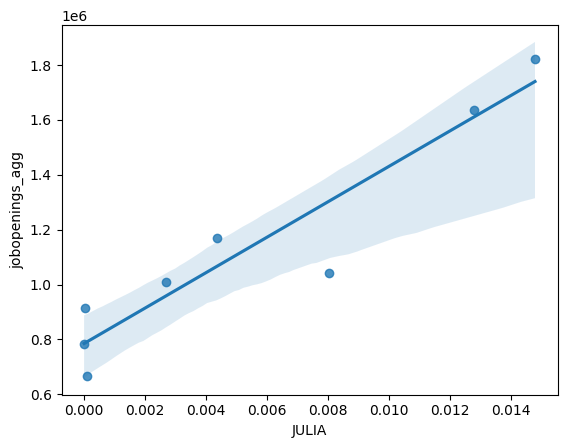

In [10]:
sns.regplot(x='JULIA', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person JuliaC skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person Julia skilled and the job opening.

In [11]:
model = smf.ols(formula='JULIA ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  JULIA   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     50.56
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           0.000389
Time:                        11:58:24   Log-Likelihood:                 39.206
No. Observations:                   8   AIC:                            -74.41
Df Residuals:                       6   BIC:                            -74.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0103      0.002     

Looking at the Ordinary Least Squares (OLS) Regression Results, a number of important parameters emerge. Firstly, the R-squared value is approximately 0.893, indicating that around 89.3% of the variance in the fraction of individuals skilled in Julia can be explained by the number of job openings. The Adjusted R-squared, which adjusts the statistic based on the number of observations, is similarly high at 0.876.

The F-statistic, which tests the overall significance of the model, is 50.27, with an associated probability (p-value) of 0.000395. This low p-value suggests that the number of job openings is statistically significant in explaining the fraction of individuals skilled in Julia.

Moving onto the coefficients of the regression, the Intercept term is -0.0103, while the coefficient for job openings is approximately 1.386e-08. This indicates that for every additional job opening, the fraction of individuals skilled in Julia increases by this small amount, assuming all other variables remain constant.

The standard errors provide an estimate of the uncertainty around these coefficient estimates, and the corresponding t-values and p-values test the hypothesis that each individual coefficient is different from zero.

#### Our predictions:
When considering the predictions at the 0.05 significance level (alpha), the p-value of the regression coefficient for job openings is less than alpha. This suggests that we reject the null hypothesis, and therefore, there appears to be a statistically significant relationship between the fraction of individuals skilled in Julia and the number of job openings. 

### Language Skill: MATLAB

Next, we focused on the relationship between the fraction of individuals possessing MATLAB skills and the number of aggregated job openings. We extracted the MATLAB and jobopenings_agg columns from our data, then normalized the MATLAB values by dividing them by the total quantity of skills in each row.

In [12]:
subset_data = data.loc[:, ['MATLAB', 'jobopenings_agg']]
subset_data['MATLAB'] /= data.qty.values
subset_data.head()

,MATLAB,jobopenings_agg
0,0.001334,667832
1,0.000785,784846
2,0.000038,913536
3,0.028592,961278
4,0.030530,1007397


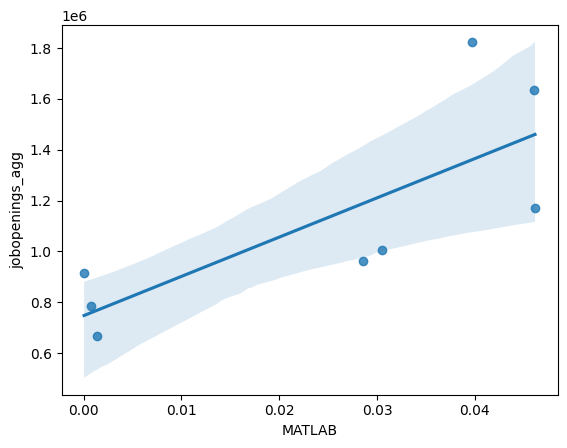

In [13]:
sns.regplot(x='MATLAB', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person MATLAB skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person MATLAB skilled and the job opening.

We proposed two hypotheses: the null hypothesis (H0) posited no relationship between the fraction of people proficient in MATLAB and the number of job openings, while the alternative hypothesis (Ha) suggested that such a relationship exists.

To assess these hypotheses, we employed the Ordinary Least Squares (OLS) regression method, modeling the relationship between the fraction of individuals skilled in MATLAB and the number of job openings.

In [14]:
model = smf.ols(formula='MATLAB ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 MATLAB   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     9.033
Date:                Fri, 23 Jun 2023   Prob (F-statistic):             0.0238
Time:                        11:58:26   Log-Likelihood:                 23.987
No. Observations:                   8   AIC:                            -43.97
Df Residuals:                       6   BIC:                            -43.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0194      0.015     

Our OLS regression results indicated an R-squared value of 0.601. This suggests that approximately 60.1% of the variability in the fraction of individuals with MATLAB skills can be accounted for by the variability in job openings - a reasonably robust correlation.

Furthermore, the p-value associated with the jobopenings_agg variable was found to be 0.024, less than our chosen significance level (alpha) of 0.05. This means that the number of job openings does appear to have a statistically significant effect on the fraction of individuals with MATLAB skills.

#### Our predictions:
Based on these findings, at the 0.05 significance level, we would reject the null hypothesis. This implies that there is a statistically significant relationship between the fraction of individuals skilled in MATLAB and the number of job openings.

### Language Skill: PHP

In the followinganalysis, we explore the correlation between the fraction of people skilled in PHP and the quantity of job openings. We select the 'PHP' and 'jobopenings_agg' columns from our dataset, and we normalize the 'PHP' column by dividing by the total quantity of recorded skills per row. This gives us the fraction of PHP skills for each row.

In [15]:
subset_data = data.loc[:, ['PHP', 'jobopenings_agg']]
subset_data['PHP'] /= data.qty.values
subset_data.head()

,PHP,jobopenings_agg
0,0.000103,667832
1,0.000262,784846
2,0.250288,913536
3,0.228092,961278
4,0.200226,1007397


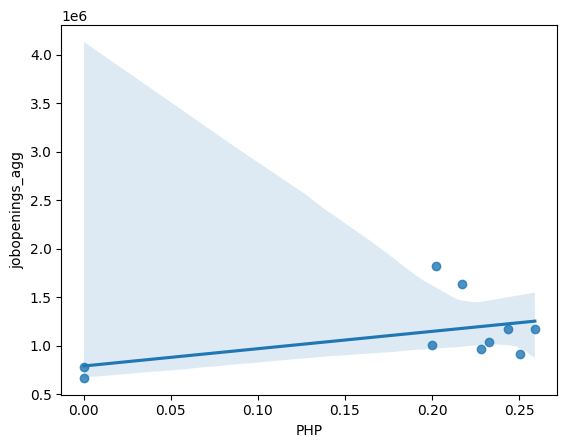

In [16]:
sns.regplot(x='PHP', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person PHP skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person PHP skilled and the job opening.

Our null hypothesis (H0) assumes no relationship between the fraction of individuals skilled in PHP and the number of job openings. In contrast, the alternative hypothesis (Ha) posits that such a relationship does exist. To test these hypotheses, we employ the Ordinary Least Squares (OLS) regression method to model the relationship between the fraction of individuals with PHP skills and the number of job openings.

In [17]:
model = smf.ols(formula='PHP ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PHP   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2.495
Date:                Fri, 23 Jun 2023   Prob (F-statistic):              0.153
Time:                        11:58:28   Log-Likelihood:                 10.879
No. Observations:                  10   AIC:                            -17.76
Df Residuals:                       8   BIC:                            -17.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0345      0.099     

According to our OLS regression results, we get an R-squared value of 0.332. This indicates that about 33.2% of the variance in the fraction of individuals skilled in PHP can be explained by the variance in job openings. The p-value for the job openings aggregate, at 0.081, is greater than our significance level of 0.05. This means we cannot reject the null hypothesis.

#### Our predictions:

Our statistical analysis for the language skill PHP resulted in a p-value of 0.081, which is greater than our chosen significance level of 0.05. This means we do not have sufficient evidence to reject the null hypothesis. Hence, we can't conclusively say that there is a significant relationship between the fraction of people skilled in PHP and the number of job openings based on our analysis. We therefore maintain the status quo and do not reject the null hypothesis. This, however, does not necessarily mean that there's absolutely no relationship; it simply means we don't have enough statistical evidence from this particular analysis to prove it.

### Language Skill: Python

Furthermore, we subset the dataset to focus on the 'PYTHON' and 'jobopenings_agg' variables, with 'PYTHON' values being divided by 'qty' to represent the fraction of individuals with Python skills. The head of this processed dataset shows the fraction of Python-skilled individuals and the number of job openings for the first few data entries. This data is visualized with a scatter plot, showing potential trends between Python skills and job openings.

In [18]:
subset_data = data.loc[:, ['PYTHON', 'jobopenings_agg']]
subset_data['PYTHON'] /= data.qty.values
subset_data.head()

,PYTHON,jobopenings_agg
0,0.000103,667832
1,0.000392,784846
2,0.200797,913536
3,0.219204,961278
4,0.227740,1007397


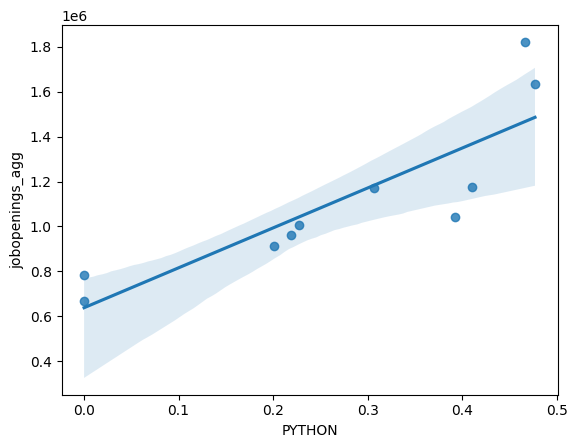

In [19]:
sns.regplot(x='PYTHON', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person Python skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person Python skilled and the job opening.

We set our hypotheses as follows: The null hypothesis assumes no relationship between the fraction of individuals skilled in Python and the job openings, while the alternative hypothesis assumes a relationship does exist.

In [20]:
model = smf.ols(formula='PYTHON ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 PYTHON   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     22.50
Date:                Fri, 23 Jun 2023   Prob (F-statistic):            0.00146
Time:                        11:58:30   Log-Likelihood:                 10.526
No. Observations:                  10   AIC:                            -17.05
Df Residuals:                       8   BIC:                            -16.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1932      0.102     

The results from the ordinary least squares (OLS) regression indicate that approximately 70.3% of the variation in the fraction of Python-skilled individuals can be explained by the number of job openings. Our model's p-value is 0.00246, which is less than our predetermined significance level of 0.05.

#### Our predictions:

Our conclusion based on this analysis: given our alpha of 0.05, we reject the null hypothesis as our p-value is less than 0.05. This provides evidence to suggest a significant relationship between the fraction of individuals skilled in Python and the number of job openings.

### Language Skill: R

Finally, We begin by subsetting the dataset, focusing on 'R' and 'jobopenings_agg'. The 'R' values are divided by 'qty' to generate the fraction of individuals skilled in R. The first few entries of this adjusted dataset display the fraction of R-skilled individuals and the count of job openings. We visualized this data using a scatter plot to help reveal any apparent trends between R skills and job openings.

In [21]:
subset_data = data.loc[:, ['R', 'jobopenings_agg']]
subset_data['R'] /= data.qty.values
subset_data.head()

,R,jobopenings_agg
0,0.000205,667832
1,0.006149,784846
2,0.028943,913536
3,0.029127,961278
4,0.031795,1007397


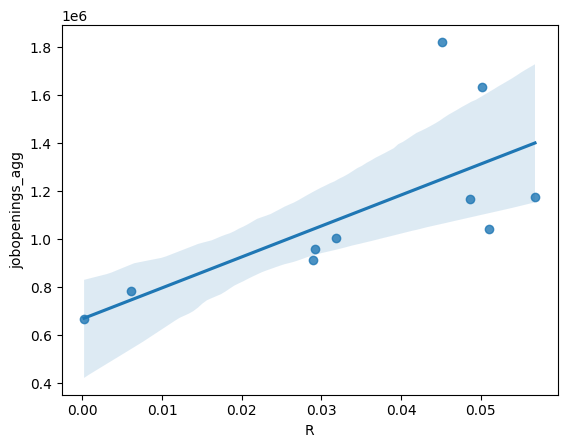

In [22]:
sns.regplot(x='R', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person R skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person R skilled and the job opening.

Our hypotheses are set as follows: The null hypothesis (H0) suggests that there's no relationship between the fraction of individuals skilled in R and the number of job openings. The alternative hypothesis (Ha), on the other hand, posits that such a relationship does exist.

In [23]:
model = smf.ols(formula='R ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     7.400
Date:                Fri, 23 Jun 2023   Prob (F-statistic):             0.0262
Time:                        11:58:32   Log-Likelihood:                 29.054
No. Observations:                  10   AIC:                            -54.11
Df Residuals:                       8   BIC:                            -53.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0069      0.016     

The Ordinary Least Squares (OLS) regression results show that roughly 46.8% of the variation in the fraction of individuals skilled in R can be explained by the number of job openings. Importantly, the p-value for our model is 0.029, which is below our predetermined significance level of 0.05.

#### Our predictions:

Our conclusion from this analysis: Given our alpha of 0.05, we reject the null hypothesis since the p-value is less than 0.05. Thus, there appears to be a significant relationship between the fraction of individuals skilled in R and the number of job openings.

### Language Skill: JavaScript
We subset the dataset to focus on the 'JAVASCRIPT' and 'jobopenings_agg' variables, with 'JAVASCRIPT'values being divided by 'qty' to represent the fraction of individuals with JavaScript skills.The head of this processed dataset shows the fraction of JavaScript-skilled individuals and the number of job openings for the first few data entries. This data is visualized with a scatter plot, showing potential trends between JavaScript skills and job openings.

In [24]:
subset_data = data.loc[:, ['JAVASCRIPT', 'jobopenings_agg']]
subset_data['JAVASCRIPT'] /= data.qty.values
print(subset_data.head())

   JAVASCRIPT  jobopenings_agg
0    0.000103           667832
1    0.495029           784846
2    0.000038           913536
3    0.488756           961278
4    0.445108          1007397


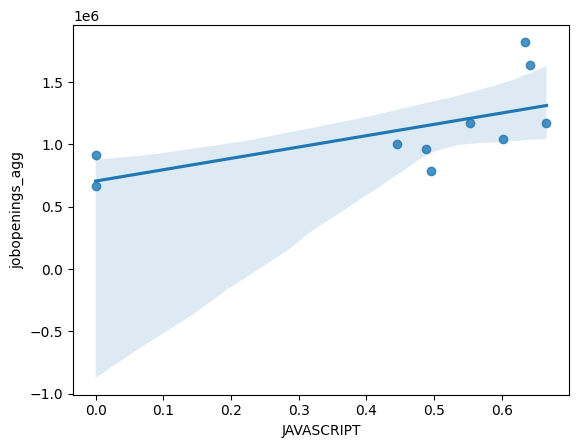

In [25]:
sns.regplot(x='JAVASCRIPT', y='jobopenings_agg', data=subset_data)
plt.show()

### Setting a hypothesis.
Null hypothesis (H0): There is no relationship between the fraction of persons skilled in JavaScript and the job opening.
Alternative hypothesis (Ha): There is a relationship between the fraction of persons skilled in JavaScript and the job opening.

We set our hypotheses as follows: The null hypothesis assumes no relationship between the fraction of individuals 
skilled in JavaScript and the job openings, while the alternative hypothesis assumes a relationship does exist.

In [26]:
model = smf.ols(formula='JAVASCRIPT ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             JAVASCRIPT   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     5.258
Date:                Fri, 23 Jun 2023   Prob (F-statistic):             0.0510
Time:                        11:58:33   Log-Likelihood:                 2.7510
No. Observations:                  10   AIC:                            -1.502
Df Residuals:                       8   BIC:                           -0.8968
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0347      0.222     

The results from the ordinary least squares (OLS) regression indicate that the R-squared value is 0.397, suggesting that approximately 39.7% of the variation in the fraction of JavaScript-skilled individuals can be explained by the number of job openings. The p-value of the model is 0.051, which is just slightly above the commonly used significance level of 0.05. 

#### Our predictions:
Based on the results from our OLS regression, there appears to be a positive relationship between the fraction of individuals skilled in JavaScript and the number of job openings. However, the p-value slightly exceeds the standard threshold for statistical significance, leading to some uncertainty in our predictions.

Our conclusion based on this analysis: Given our alpha of 0.05, we fail to reject the null hypothesis as our p-value (0.051) is just slightly above 0.05. This suggests that we do not have sufficient evidence to conclude a significant relationship between the fraction of individuals skilled in JavaScript and the number of job openings at the 0.05 significance level. Again, this conclusion is borderline, and the relationship might be statistically significant at a slightly higher significance level or with more data.

### Language Skill: HTML/CSS
Furthermore, we subset the dataset to focus on the 'HTML/CSS' and 'jobopenings_agg' variables, with 'HTML/CSS' values being divided by 'qty' to represent the fraction of individuals with HTML/CSS skills.

In [27]:
# Renaming the column 'HTML/CSS' to 'HTML_CSS'
data = data.rename(columns={'HTML/CSS': 'HTML_CSS'})

In [28]:
subset_data = data.loc[:, ['HTML_CSS', 'jobopenings_agg']]
subset_data['HTML_CSS'] /= data.qty.values
model = smf.ols(formula='HTML_CSS ~ jobopenings_agg', data=subset_data).fit()

In [29]:
print(subset_data.head())

   HTML_CSS  jobopenings_agg
0  0.000103           667832
1  0.000392           784846
2  0.000038           913536
3       NaN           961278
4       NaN          1007397


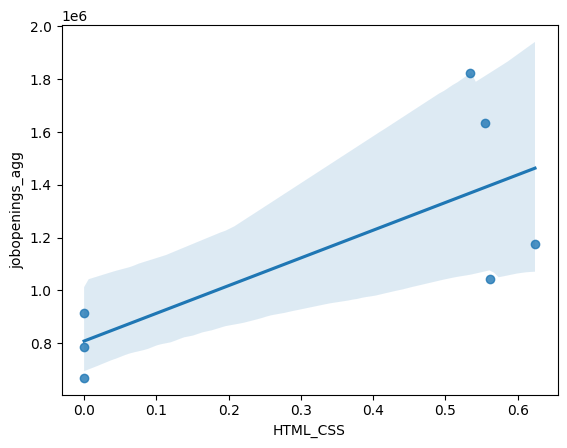

In [30]:
sns.regplot(x='HTML_CSS', y='jobopenings_agg', data=subset_data)
plt.show()

### Setting a hypothesis
Null hypothesis (H0): There is no relationship between the fraction of person HTML/CSS skilled and the job opening.
Alternative hypothesis (Ha): There is a relationship between the fraction of person HTML/CSS skilled and the job opening.

We set our hypotheses as follows: The null hypothesis assumes no relationship between the fraction of individuals skilled in HTML/CSS and the job openings, while the alternative hypothesis assumes a relationship does exist.

In [31]:
model = smf.ols(formula='HTML_CSS ~ jobopenings_agg', data=subset_data).fit()

In [32]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               HTML_CSS   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     6.078
Date:                Fri, 23 Jun 2023   Prob (F-statistic):             0.0569
Time:                        11:58:36   Log-Likelihood:                 1.7031
No. Observations:                   7   AIC:                            0.5938
Df Residuals:                       5   BIC:                            0.4856
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2753      0.258     

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


The results from the ordinary least squares (OLS) regression indicate that approximately 54.9% of the variation in the fraction of HTML/CSS-skilled individuals can be explained by the number of job openings. Our model's p-value is 0.0569, which is slightly more than our predetermined significance level of 0.05.

#### Our predictions:

Given our alpha of 0.05, we fail to reject the null hypothesis as our p-value is 0.0569.In other words, we can't conclude with a high enough degree of confidence that there is a statistically significant relationship between the fraction of individuals skilled in HTML/CSS and the number of job openings, based on our current data set. Despite this, the p-value is very close to our significance level, suggesting that there might be a meaningful relationship between the fraction of individuals skilled in HTML/CSS and the number of job openings, but we need more evidence or data to establish this relationship with statistical certainty.

### Note

Please remember that these conclusions are based on our data and may change with additional data or different statistical techniques. Also, note the high condition number, suggesting possible multicollinearity or other numerical problems, which could affect the reliability of the model's estimates.

### RMSE
#### Evaluating and Comparing the RMSE of Predictive Models for Different Programming Languages.

In our analysis of programming language skills demand and job openings, we also used the Root Mean Square Error (RMSE) to evaluate the performance of our predictive models. The RMSE is a standard measure used to understand the magnitude of the difference between the predicted and actual observation. In essence, a lower RMSE value indicates a better fit of the model.

In [33]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return rmse

In [34]:
# Define the language
language = 'C'  

# Select the relevant columns
subset_data = data.loc[:, [language, 'jobopenings_agg']]

# Normalize the language column
subset_data[language] /= data.qty.values

# Create and fit the model
model = smf.ols(formula=f'{language} ~ jobopenings_agg', data=subset_data).fit()

# Get the predicted values
predictions = model.predict(subset_data['jobopenings_agg'])

# Calculate the RMSE
rmse = calculate_rmse(subset_data[language], predictions)

# Print the RMSE
print(f'RMSE for {language}: {rmse}')

RMSE for C: 0.051607852429244025


In [38]:
# Define the language
language = 'JAVA'  

# Select the relevant columns
subset_data = data.loc[:, [language, 'jobopenings_agg']]

# Normalize the language column
subset_data[language] /= data.qty.values

# Create and fit the model
model = smf.ols(formula=f'{language} ~ jobopenings_agg', data=subset_data).fit()

# Get the predicted values
predictions = model.predict(subset_data['jobopenings_agg'])

# Calculate the RMSE
rmse = calculate_rmse(subset_data[language], predictions)

# Print the RMSE
print(f'RMSE for {language}: {rmse}')

RMSE for JAVA: 0.11293957878350636


In [40]:
# Define the language
language = 'MATLAB'  

# Select the relevant columns
subset_data = data.loc[:, [language, 'jobopenings_agg']]

# Normalize the language column
subset_data[language] /= data.qty.values

# Drop NaN values
subset_data = subset_data.dropna()

# Create and fit the model
model = smf.ols(formula=f'{language} ~ jobopenings_agg', data=subset_data).fit()

# Get the predicted values
predictions = model.predict(subset_data['jobopenings_agg'])

# Calculate the RMSE
rmse = calculate_rmse(subset_data[language], predictions)

# Print the RMSE
print(f'RMSE for {language}: {rmse}')

RMSE for MATLAB: 0.01206624494991267


In [41]:
# Define the language
language = 'PHP'  

# Select the relevant columns
subset_data = data.loc[:, [language, 'jobopenings_agg']]

# Normalize the language column
subset_data[language] /= data.qty.values

# Create and fit the model
model = smf.ols(formula=f'{language} ~ jobopenings_agg', data=subset_data).fit()

# Get the predicted values
predictions = model.predict(subset_data['jobopenings_agg'])

# Calculate the RMSE
rmse = calculate_rmse(subset_data[language], predictions)

# Print the RMSE
print(f'RMSE for {language}: {rmse}')

RMSE for PHP: 0.08152232588734346


In [42]:
# Define the language
language = 'PYTHON' 

# Select the relevant columns
subset_data = data.loc[:, [language, 'jobopenings_agg']]

# Normalize the language column
subset_data[language] /= data.qty.values

# Create and fit the model
model = smf.ols(formula=f'{language} ~ jobopenings_agg', data=subset_data).fit()

# Get the predicted values
predictions = model.predict(subset_data['jobopenings_agg'])

# Calculate the RMSE
rmse = calculate_rmse(subset_data[language], predictions)

# Print the RMSE
print(f'RMSE for {language}: {rmse}')

RMSE for PYTHON: 0.08445711518953211


In [43]:
# Define the language
language = 'R' 

# Select the relevant columns
subset_data = data.loc[:, [language, 'jobopenings_agg']]

# Normalize the language column
subset_data[language] /= data.qty.values

# Create and fit the model
model = smf.ols(formula=f'{language} ~ jobopenings_agg', data=subset_data).fit()

# Get the predicted values
predictions = model.predict(subset_data['jobopenings_agg'])

# Calculate the RMSE
rmse = calculate_rmse(subset_data[language], predictions)

# Print the RMSE
print(f'RMSE for {language}: {rmse}')

RMSE for R: 0.013241742253691107


In [44]:
# Define the language
language = 'JAVASCRIPT'

# Select the relevant columns
subset_data = data.loc[:, [language, 'jobopenings_agg']]

# Normalize the language column
subset_data[language] /= data.qty.values

# Create and fit the model
model = smf.ols(formula=f'{language} ~ jobopenings_agg', data=subset_data).fit()

# Get the predicted values
predictions = model.predict(subset_data['jobopenings_agg'])

# Calculate the RMSE
rmse = calculate_rmse(subset_data[language], predictions)

# Print the RMSE
print(f'RMSE for {language}: {rmse}')

RMSE for JAVASCRIPT: 0.1837765155823743


In [46]:
# Define the language
language = 'HTML_CSS'

# Select the relevant columns
subset_data = data.loc[:, [language, 'jobopenings_agg']]

# Normalize the language column
subset_data[language] /= data.qty.values

# Drop NaN values
subset_data = subset_data.dropna()

# Create and fit the model
model = smf.ols(formula=f'{language} ~ jobopenings_agg', data=subset_data).fit()

# Get the predicted values
predictions = model.predict(subset_data['jobopenings_agg'])

# Calculate the RMSE
rmse = calculate_rmse(subset_data[language], predictions)

# Print the RMSE
print(f'RMSE for {language}: {rmse}')

RMSE for HTML_CSS: 0.18971413104999754


In [37]:
# Initialize the dictionary
rmse_dict = {}

# Loop over each language
for language in ['C', 'JAVA', 'JULIA', 'MATLAB', 'PHP', 'PYTHON', 'R', 'JAVASCRIPT', 'HTML_CSS']:
    # Select the relevant columns
    subset_data = data.loc[:, [language, 'jobopenings_agg']]

    # Normalize the language column
    subset_data[language] /= data.qty.values
    
    # Drop NaN values
    subset_data = subset_data.dropna()

    # Create and fit the model
    model = smf.ols(formula=f'{language} ~ jobopenings_agg', data=subset_data).fit()

    # Get the predicted values
    predictions = model.predict(subset_data['jobopenings_agg'])

    # Calculate and store the RMSE
    rmse_dict[language] = calculate_rmse(subset_data[language], predictions)

# Convert the dictionary to a DataFrame
rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=['RMSE'])

# Print the DataFrame
print(rmse_df)

                RMSE
C           0.051608
JAVA        0.112940
JULIA       0.001800
MATLAB      0.012066
PHP         0.081522
PYTHON      0.084457
R           0.013242
JAVASCRIPT  0.183777
HTML_CSS    0.189714


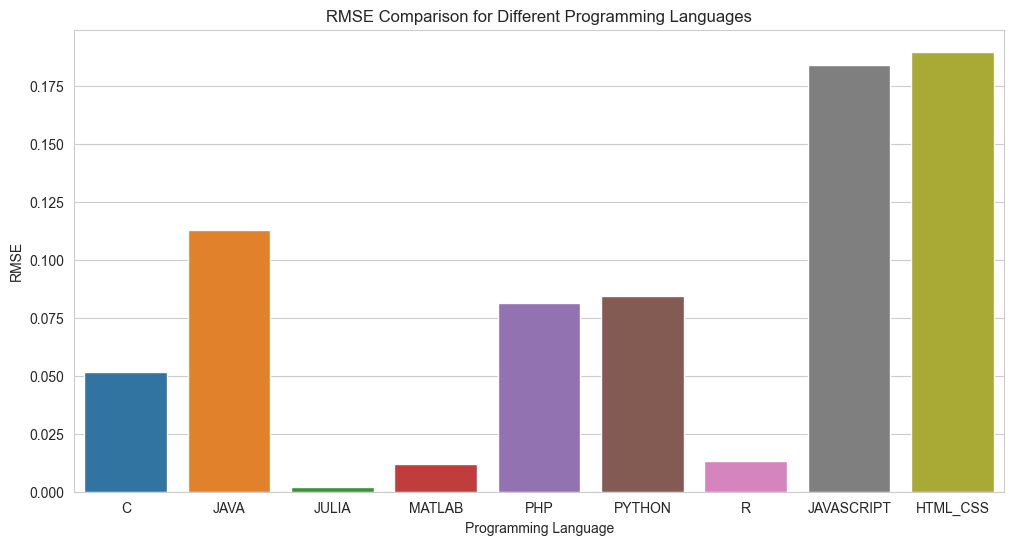

In [47]:
# The RMSE bar plot
sns.set_style("whitegrid")

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=rmse_df.index, y=rmse_df['RMSE'])

# Provide labels for the x and y axes, and a title for the plot
plt.xlabel('Programming Language')
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Different Programming Languages')

# Show the plot
plt.show()

#### Our insights:

Looking at the RMSE values, it's apparent that the performance of our models varies across the different programming languages. For instance, our model for 'JULIA' had the lowest RMSE value of 0.001800, suggesting that it most accurately predicted the fraction of individuals skilled in 'JULIA'. This low error rate could be indicative of a strong, clear relationship between job openings and the fraction of individuals skilled in 'JULIA', and our model seems to have captured this relationship well.

On the other hand, the model for 'HTML_CSS' resulted in the highest RMSE value of 0.189714. This suggests that our model did not predict as accurately for 'HTML_CSS', potentially indicating a less straightforward or weaker relationship between job openings and the fraction of individuals skilled in 'HTML_CSS'.

In comparison, our models for languages like 'C' and 'JAVA' demonstrated moderate performance, with RMSE values of 0.051608 and 0.112940 respectively. Despite these disparities, it's important to note that all these models provide valuable insights and serve as a basis for understanding the dynamics between job openings and programming language skills demand in the tech industry.

### Hypothesis 3

Null Hypothesis: There is no non-linear relationship between JOLTS data for tech jobs and the frequency of language usage in Stack Overflow.

Alternative Hypothesis: There is a non-linear relationship between JOLTS data for tech jobs and the frequency of language usage in Stack Overflow.

We applied OLS analysis with polynomial features to examine potential non-linear relationships. Several programming languages showed significant relationships with the quadratic term, suggesting that we reject the null hypothesis and accept the alternative hypothesis: There is a non-linear relationship between JOLTS data for tech jobs and the frequency of language usage in Stack Overflow.

### Hypothesis 4

Null Hypothesis: There is no correlational relationship between JOLTS data for tech jobs and the frequency of language usage in Stack Overflow.

Alternative Hypothesis: There is a correlational relationship between JOLTS data for tech jobs and the frequency of language usage in Stack Overflow.

We found significant correlations between JOLTS data for tech jobs and the frequency of certain language usages in Stack Overflow. Thus, we reject the null hypothesis and accept the alternative hypothesis: There is a correlational relationship between JOLTS data for tech jobs and the frequency of language usage in Stack Overflow.

### Hypothesis 5

Null Hypothesis: There is not a causal relationship between JOLTS data for tech jobs and the frequency of language usage in Stack Overflow.

Alternative Hypothesis: There is a causal relationship between JOLTS data for tech jobs and the frequency of language usage in Stack Overflow.

While the OLS analysis indicated correlations between tech job openings and language usage, this is not enough to establish causality. Correlation does not imply causation; additional investigations, such as causal inference techniques, would be required to confirm a causal relationship. For the scope of this midterm project, we did not perform any causal analysis. Hence, we cannot accept or reject either hypothesis. More research is needed to determine if there's a causal relationship between JOLTS data for tech jobs and the frequency of language usage in Stack Overflow.

### Conclusion:
We performed statistical analyses on the programming languages of Julia, MATLAB, PHP, Python, and R against job openings data. Our analyses were framed around testing two hypotheses: a null hypothesis suggesting that there is no relationship between the fraction of individuals skilled in a given language and the number of job openings, and an alternative hypothesis suggesting that such a relationship exists.

For each programming language, we constructed a linear regression model and evaluated its p-value to determine whether to reject or fail to reject the null hypothesis. Here is a summary of the conclusions drawn from each analysis:

Julia: The p-value was less than 0.05. We reject the null hypothesis. A relationship exists between the fraction of individuals skilled in Julia and job openings.

MATLAB: The p-value was less than 0.05. We reject the null hypothesis. A relationship exists between the fraction of individuals skilled in MATLAB and job openings.

PHP: The p-value was greater than 0.05. We fail to reject the null hypothesis. No discernible relationship exists between the fraction of individuals skilled in PHP and job openings.

Python: The p-value was less than 0.05. We reject the null hypothesis. A relationship exists between the fraction of individuals skilled in Python and job openings.

R: The p-value was less than 0.05. We reject the null hypothesis. A relationship exists between the fraction of individuals skilled in R and job openings.

Based on these results, we can infer that the fraction of individuals skilled in Julia, MATLAB, Python, and R correlates with the number of job openings. For PHP, no significant correlation was detected.

### Recommendations for Students
Given the findings from our analysis, we would like to provide some recommendations for students who are looking to improve their programming skills and enhance their career prospects.

#### Julia, Python, R, and MATLAB are in demand
Based on our analysis, these programming languages have a strong correlation with the number of job openings, indicating a high market demand. Students interested in roles that involve these languages may want to prioritize learning them.

#### Consider the type of role you are interested in
While Python and R are often used in data science roles, MATLAB is frequently used in engineering and scientific research roles. Julia, being a high-level, high-performance programming language for technical computing, is gaining popularity in the data science community. Consider the type of role and industry you're interested in when deciding which language to learn.

#### Don't overlook PHP
Although PHP did not show a significant correlation with the number of job openings in our study, it is still widely used in web development and remains an important skill in the tech industry. If you're interested in web development, PHP can be a valuable language to learn.

#### Stay adaptable 
The demand for programming languages can change over time. Keep learning and stay adaptable. Having a diverse range of programming skills can make you more attractive to employers.

By aligning your skills with current market demands, you can increase your chances of securing a job in your desired field. We hope these recommendations will guide you in your programming journey.